## Exercise 2.3 Fundamentals of Visualization libraries Part 1

2. In a new notebook, import all necessary libraries and read in your final dataset from part 2, step 8 of the previous task.

In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
from datetime import datetime as dt

In [2]:
import matplotlib
matplotlib.__version__

'3.8.4'

In [3]:
df = pd.read_csv('newyork_data.csv', index_col = 0)

/var/folders/wd/xh8m0hc916l1ffmsssspd3f40000gn/T/ipykernel_39893/3816047514.py:1: DtypeWarning: Columns (6,8) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('newyork_data.csv', index_col = 0)


In [4]:
df.head()

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,date,avgTemp,_merge
0,DF208007EE5F9D79,classic_bike,2022-08-26 15:21:44,2022-08-26 15:34:20,Berkeley Pl & 6 Ave,4134.06,Windsor Pl & 8 Ave,3620.02,40.676530,-73.978469,40.660906,-73.983074,member,2022-08-26,27.4,both
1,48A796B4996BACB0,electric_bike,2022-08-03 12:56:29,2022-08-03 13:06:10,21 St & 4 Ave,3668.04,Degraw St & Smith St,4298.05,40.662584,-73.995554,40.682915,-73.993182,member,2022-08-03,27.6,both
2,AE459F435C0B1D5B,classic_bike,2022-08-11 17:49:47,2022-08-11 18:05:08,48 St & Barnett Ave,6358.05,Queens Plaza North & Crescent St,6429.01,40.750016,-73.915409,40.751102,-73.940737,member,2022-08-11,26.6,both
3,CA8B4A94620E74C0,electric_bike,2022-08-10 17:25:41,2022-08-10 17:35:23,7 Ave & Central Park South,6912.01,8 Ave & W 33 St,6450.12,40.766741,-73.979069,40.751551,-73.993934,member,2022-08-10,27.2,both
4,EB85C6F0148BC348,classic_bike,2022-08-31 13:47:12,2022-08-31 14:24:00,Jerome Ave & W 195 St,8653.09,Sherman Ave & E 166 St,8072.06,40.868858,-73.896500,40.831305,-73.917448,member,2022-08-31,25.6,both


In [5]:
df.dtypes

ride_id                object
rideable_type          object
started_at             object
ended_at               object
start_station_name     object
start_station_id       object
end_station_name       object
end_station_id         object
start_lat             float64
start_lng             float64
end_lat               float64
end_lng               float64
member_casual          object
date                   object
avgTemp               float64
_merge                 object
dtype: object

In [6]:
# change datatypes for memory 
df['end_lat'] = df['end_lat'].astype('float32')

In [7]:
df['end_lng'] = df['end_lng'].astype('float32')

In [8]:
df['start_lat'] = df['start_lat'].astype('float32')

In [9]:
df['start_lng'] = df['start_lng'].astype('float32')

In [10]:
df['avgTemp'] = df['avgTemp'].astype('float32')

In [11]:
# drop _merge column from previous merge
df.drop(columns = {'_merge'}, inplace = True)

In [12]:
# check shape
df.shape

(30689921, 15)

In [13]:
# change date datatype to datetime
df['date'] = pd.to_datetime(df['date'])

In [14]:
df.dtypes

ride_id                       object
rideable_type                 object
started_at                    object
ended_at                      object
start_station_name            object
start_station_id              object
end_station_name              object
end_station_id                object
start_lat                    float32
start_lng                    float32
end_lat                      float32
end_lng                      float32
member_casual                 object
date                  datetime64[ns]
avgTemp                      float32
dtype: object

In [15]:
# set index to date
df_temp = df.set_index('date')

In [16]:
df_temp.head()

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,avgTemp
date,,,,,,,,,,,,,,
2022-08-26,DF208007EE5F9D79,classic_bike,2022-08-26 15:21:44,2022-08-26 15:34:20,Berkeley Pl & 6 Ave,4134.06,Windsor Pl & 8 Ave,3620.02,40.676529,-73.978470,40.660908,-73.983070,member,27.400000
2022-08-03,48A796B4996BACB0,electric_bike,2022-08-03 12:56:29,2022-08-03 13:06:10,21 St & 4 Ave,3668.04,Degraw St & Smith St,4298.05,40.662582,-73.995552,40.682915,-73.993179,member,27.600000
2022-08-11,AE459F435C0B1D5B,classic_bike,2022-08-11 17:49:47,2022-08-11 18:05:08,48 St & Barnett Ave,6358.05,Queens Plaza North & Crescent St,6429.01,40.750015,-73.915413,40.751102,-73.940735,member,26.600000
2022-08-10,CA8B4A94620E74C0,electric_bike,2022-08-10 17:25:41,2022-08-10 17:35:23,7 Ave & Central Park South,6912.01,8 Ave & W 33 St,6450.12,40.766739,-73.979073,40.751553,-73.993935,member,27.200001
2022-08-31,EB85C6F0148BC348,classic_bike,2022-08-31 13:47:12,2022-08-31 14:24:00,Jerome Ave & W 195 St,8653.09,Sherman Ave & E 166 St,8072.06,40.868858,-73.896500,40.831306,-73.917450,member,25.600000


In [17]:
# sort index 
df_temp = df_temp.sort_index(axis=0, level=None, ascending=True, inplace=False, kind='quicksort', na_position='last', sort_remaining=True, ignore_index=False, key=None)

In [18]:
df_temp.head()

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,avgTemp
date,,,,,,,,,,,,,,
2022-01-01,4AF1BF6A3B91C4FC,electric_bike,2022-01-01 02:19:30,2022-01-01 02:40:27,E 85 St & York Ave,7146.04,E 2 St & 2 Ave,5593.02,40.775368,-73.948036,40.725029,-73.990700,member,11.6
2022-01-01,9FA13228F53D68E2,electric_bike,2022-01-01 21:09:11,2022-01-01 21:19:35,E 48 St & 5 Ave,6626.01,Broadway & W 61 St,7014.12,40.757244,-73.978058,40.770031,-73.981972,member,11.6
2022-01-01,D7A84A9910DBF557,classic_bike,2022-01-01 01:56:36,2022-01-01 01:57:53,Canal St & Rutgers St,5303.08,Canal St & Rutgers St,5303.08,40.714275,-73.989899,40.714275,-73.989899,member,11.6
2022-01-01,E037110BEE97B46A,classic_bike,2022-01-01 13:31:09,2022-01-02 12:24:30,W 63 St & Broadway,7052.01,NaN,NaN,40.771637,-73.982613,40.759998,-73.970001,member,11.6
2022-01-01,8EEE5BF5538122A5,electric_bike,2022-01-01 01:15:12,2022-01-01 02:37:56,6 Ave & W 34 St,6364.1,W 42 St & 6 Ave,6517.08,40.749641,-73.988052,40.754921,-73.984550,casual,11.6


In [19]:
matplotlib.rcParams['agg.path.chunksize'] = 1000

3. Create a line plot of the temperatures for 2022 plotted as time series using the weather dataframe. For this example, use a pandas plotting function.

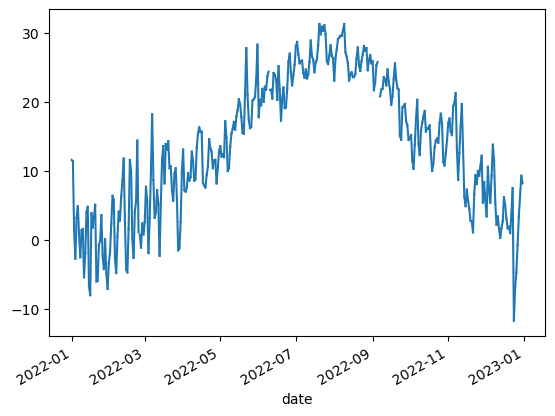

In [20]:
df_temp['avgTemp'].plot()
plt.show()

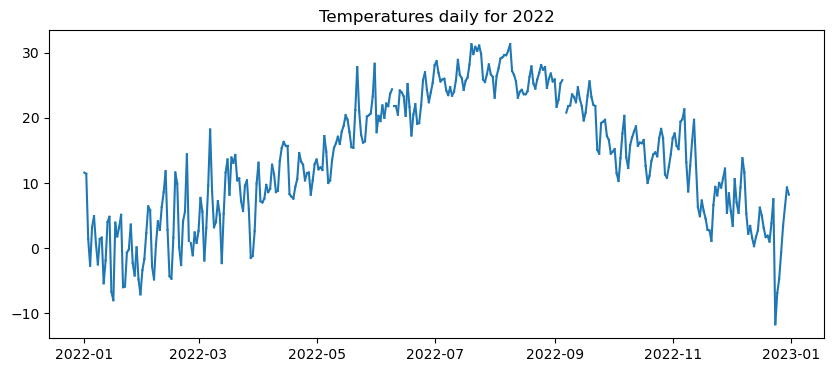

In [21]:
plt.figure(figsize=(10,4))
plt.title('Temperatures daily for 2022')
plt.plot(df_temp['avgTemp'])
plt.show()

4. Create a column with the count of trips per day and merge it with the weather dataframe.

In [22]:
# Groupby the count of the trips 

df_group = pd.DataFrame(df.groupby(['date'])['ride_id'].count()).reset_index()

In [23]:
df_group.head()

,date,ride_id
0,2022-01-01,20895
1,2022-01-02,44234
2,2022-01-03,34126
3,2022-01-04,37879
4,2022-01-05,35080


In [24]:
# merge daily trips and daily temp dataframes
df_group.rename(columns = {'ride_id':'bike_rides_daily'}, inplace = True)
df = df.merge(df_group, on = "date", how = 'outer', indicator = True)
print(df['_merge'].value_counts(dropna = False))
print("Shape of January 1st is", df[df['date'] == '2022-01-01'].shape) # Check 
print("Shape of January 2nd is", df[df['date'] == '2022-01-02'].shape) # Second check 

df_temp = df.set_index('date')

print(df_temp.columns)

_merge
both          30689921
left_only            0
right_only           0
Name: count, dtype: int64
Shape of January 1st is (20895, 17)
Shape of January 2nd is (44234, 17)
Index(['ride_id', 'rideable_type', 'started_at', 'ended_at',
       'start_station_name', 'start_station_id', 'end_station_name',
       'end_station_id', 'start_lat', 'start_lng', 'end_lat', 'end_lng',
       'member_casual', 'avgTemp', 'bike_rides_daily', '_merge'],
      dtype='object')


In [25]:
df_temp.head()

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,avgTemp,bike_rides_daily,_merge
date,,,,,,,,,,,,,,,,
2022-01-01,F2147CAB2E003A12,classic_bike,2022-01-01 00:56:36,2022-01-01 01:06:55,Cedar St & Evergreen Ave,4721.01,Willoughby Ave & Tompkins Ave,4665.02,40.696709,-73.928070,40.694256,-73.946266,member,11.6,20895,both
2022-01-01,27FF7FCE0F8A02DF,classic_bike,2022-01-01 15:42:26,2022-01-01 16:02:59,Albany St & Greenwich St,5145.02,Bayard St & Baxter St,5351.03,40.709267,-74.013245,40.716022,-73.999741,casual,11.6,20895,both
2022-01-01,E413BC1D0B4C6031,classic_bike,2022-01-01 15:37:55,2022-01-01 16:03:05,Albany St & Greenwich St,5145.02,Bayard St & Baxter St,5351.03,40.709267,-74.013245,40.716022,-73.999741,casual,11.6,20895,both
2022-01-01,1967ADD90811CE78,electric_bike,2022-01-01 17:35:23,2022-01-01 17:46:05,Cabrini Blvd & W 177 St,8358.1,Broadway & W 220 St,8715.01,40.848282,-73.941345,40.872414,-73.912804,member,11.6,20895,both
2022-01-01,D199C729356BA836,classic_bike,2022-01-01 19:25:20,2022-01-01 19:41:53,5 Ave & E 72 St,7100.07,W 41 St & 8 Ave,6602.03,40.772827,-73.966850,40.756405,-73.990028,casual,11.6,20895,both


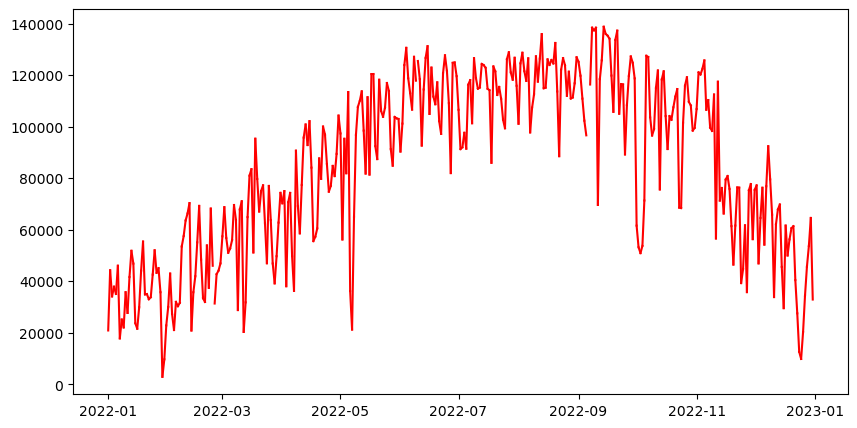

In [26]:
# Create figure and axis objects with subplots()

fig,ax = plt.subplots(figsize=(10, 5))

# Make a plot of the bike rides
ax.plot(df_temp['bike_rides_daily'],color = "red")

5. Create a line chart of bike trip counts and temperatures plotted on a dual axis.

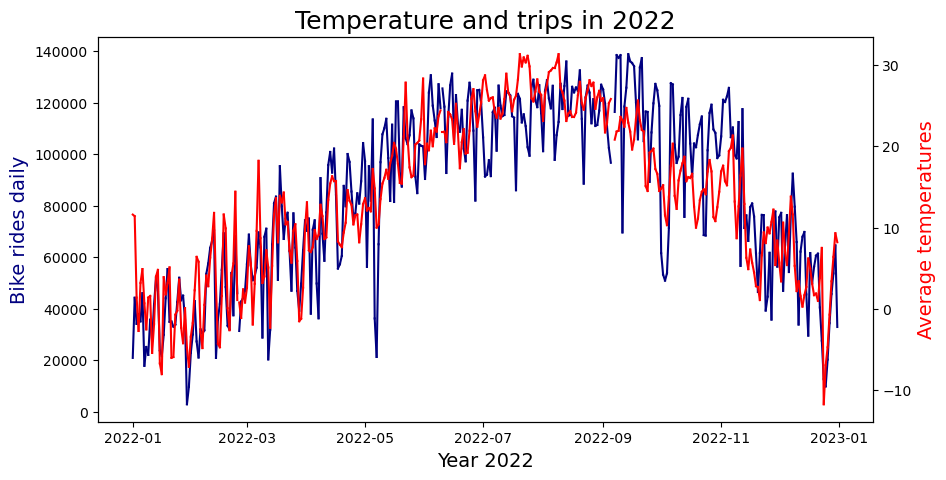

In [27]:
# Create figure and axis objects with subplots() and details

fig,ax = plt.subplots(figsize=(10, 5))

# Make a plot of the bike rides
ax.plot(df_temp['bike_rides_daily'],color = "navy")
ax.set_xlabel("Year 2022", fontsize = 14) # set x-axis label
ax.set_ylabel("Bike rides daily",color = "navy", fontsize = 14) # set y-axis label

# initialize a twin object for two different y-axis on the sample plot
ax2 = ax.twinx()

# Make a plot with the temperatures on the y-axis using second axis object
ax2.plot(df_temp["avgTemp"], color = "red")
ax2.set_ylabel("Average temperatures", color = "red",fontsize=14)
plt.title('Temperature and trips in 2022', fontsize = 18)
plt.show()

In [28]:
plt.style.use('ggplot')

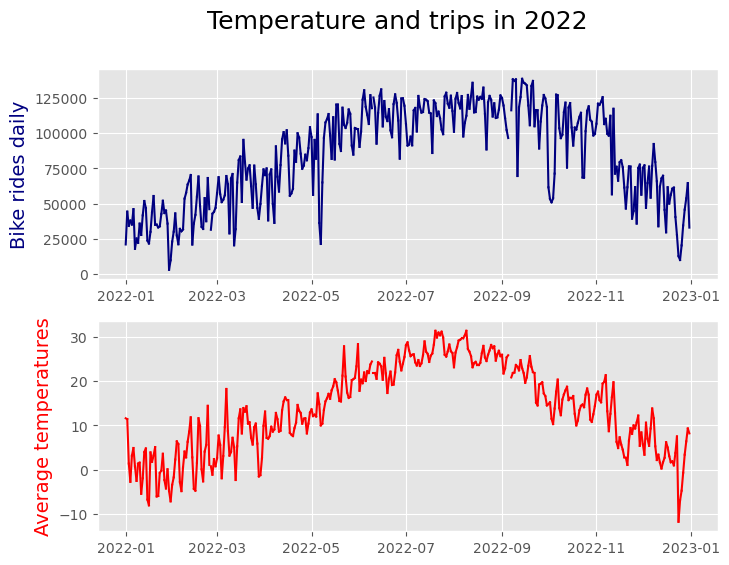

In [29]:
# Create figure and axis objects with subplots() and details

fig,ax = plt.subplots(2, figsize =(8, 6))

# Make a plot of the bike rides
ax[0].plot(df_temp['bike_rides_daily'],color = "navy")
ax[0].set_ylabel("Bike rides daily",color = "navy", fontsize = 14) # set y-axis label

# Make a plot with the temperatures on the y-axis using second axis object
ax[1].plot(df_temp["avgTemp"], color = "red")
ax[1].set_ylabel("Average temperatures", color = "red",fontsize=14)
plt.suptitle('Temperature and trips in 2022', fontsize = 18)

plt.show()

6. In a markdown cell, briefly explain your code; how did you use Matplotlib to achieve this? Which paradigm did you use?

I used the Object-Oriented approach. I created a graph object with this code "fig,ax = plt.subplots(figsize=(10, 5))", then was able to add the information I wanted into the object and create the dual axis with the bike rides daily and its measurement on one axis and the avg temperatures on the other axis. I used the same approach to also create the last graph with two plots but did not use the twinx code that makes it a twin axis. 

In [30]:
# save the plot as a file
fig.savefig('trips_temperatures_dual_line.jpg',
            format='jpeg',
            dpi=100,
            bbox_inches='tight')